In [2]:
import matplotlib.pyplot as plt
from numpy import *

## coupled AOM feedback code
A model for controlling the MOT laser power for the 4 MOT beams whose outputs are inside the vacuum chamber. By measuring the light from, e.g. MOT beam 1, which couples back through MOT beam 3, we can
stabilize it. If we keep track of how much we varied the power of MOT 1 when we adjusted AOM 1, we can divide out this effect when
we measure and correct MOT 3, which also depends on the diffraction efficiency of AOM 1.

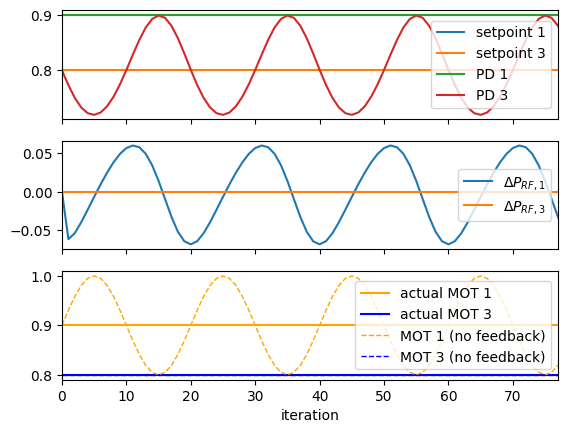

In [3]:
# example: there is a slowly varying sinusoidal noise on MOT 1,
# due, e.g., to temperature drifts in the lab which change the 
# fiber coupling. if we perfectly cancel the drift by changing
# AOM 1, we will see apparent drift of MOT 3 on PD 3. However,
# by using the scheme proposed above we will not wrongly
# adjust MOT 3 which has no real drift.

iters = 80

kp1 = kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

eta1 = 1 # the diffraction efficiency of AOM 1 normalized to be 1
eta3 = 1 # the diffraction efficiency of AOM 3.

sp1 = 0.9 # arbitrary; in some units for the PD
sp3 = 0.8

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)
PD1[0] = sp1 # this is the baseline power seen at the PD
PD3[0] = sp3

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

error1[0] = 0 #sp1 - PD1[0]*eta1*eta3 # 0. only valid at the moment the setpoint is defined
error3[0] = 0 #sp3 - PD3[0]*eta1*eta3

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power)

noise1 = lambda i: 0.1*sin(3*pi*i/30) # slow fiber drift
noise3 = lambda i: 0.0*i

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the actual value of power at the atoms
mot_power3 = zeros(iters)

mot_power1[0] = PD1[0]/eta3 # the power that we would measure before AOM 3 if we could
mot_power3[0] = PD3[0]/eta1

for i in range(1,iters):
    
    # measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = (PD1[0] + noise1(i))*eta1*eta3
    
    # adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]/eta3 #PD1[i-1]/(1+dPD3)
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    PD1[i] += g1*delta_rf_power1[i]
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM
    eta1 += dPD1 #*= (1+dPD1)
    
    # measure power on ch3
    PD3[i] = (PD3[0] + noise3(i))*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]/eta1 #(1+dPD1)
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    PD3[i] += g3*delta_rf_power3[i]
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 += dPD3 #*= (1+dPD3)
    
    mot_power1[i] = PD1[i]/eta3
    mot_power3[i] = PD3[i]/eta1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='actual MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='actual MOT 3',c='blue')
ax3.plot(steps,sp1+noise1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
ax3.plot(steps,sp3+noise3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
# ax3.set_ylim((0.99*minp,1.01*maxp))
for ax in axes:
    ax.set_xlim((0,iters-3))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()

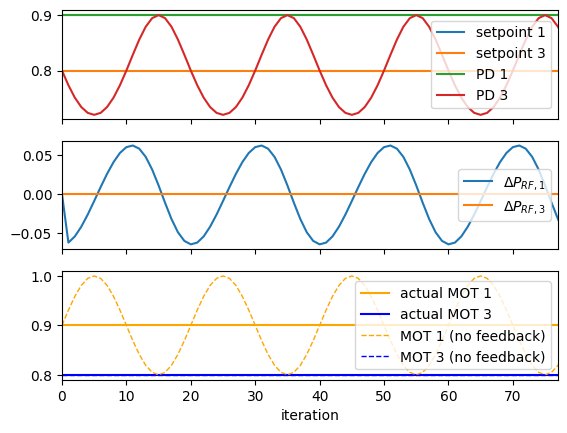

In [62]:
# example: there is a slowly varying sinusoidal noise on MOT 1,
# due, e.g., to temperature drifts in the lab which change the 
# fiber coupling. if we perfectly cancel the drift by changing
# AOM 1, we will see apparent drift of MOT 3 on PD 3. However,
# by using the scheme proposed above we will not wrongly
# adjust MOT 3 which has no real drift.

iters = 80

kp1 = kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

eta1 = 1 # the diffraction efficiency of AOM 1 normalized to be 1
eta3 = 1 # the diffraction efficiency of AOM 3.

sp1 = 0.9 # arbitrary; in some units for the PD
sp3 = 0.8

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)
PD1[0] = sp1 # this is the baseline power seen at the PD
PD3[0] = sp3

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

error1[0] = 0 #sp1 - PD1[0]*eta1*eta3 # 0. only valid at the moment the setpoint is defined
error3[0] = 0 #sp3 - PD3[0]*eta1*eta3

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power)

noise1 = lambda i: 0.1*sin(3*pi*i/30) # slow fiber drift
noise3 = lambda i: 0.0*i

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the actual value of power at the atoms
mot_power3 = zeros(iters)

mot_power1[0] = PD1[0]/eta3 # the power that we would measure before AOM 3 if we could
mot_power3[0] = PD3[0]/eta1

for i in range(1,iters):
    
    # measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = (PD1[0] + noise1(i))*eta1*eta3
    
    # adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]/eta3 #PD1[i-1]/(1+dPD3)
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    PD1[i] += g1*delta_rf_power1[i]
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM
    eta1 *= (1+dPD1)
    
    mot_power1[i] = PD1[i]/eta3
    
    # measure power on ch3
    PD3[i] = (PD3[0] + noise3(i))*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]/eta1 #(1+dPD1)
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    PD3[i] += g3*delta_rf_power3[i]
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 *= (1+dPD3)
    
    mot_power3[i] = PD3[i]/eta1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='actual MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='actual MOT 3',c='blue')
ax3.plot(steps,sp1+noise1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
ax3.plot(steps,sp3+noise3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
# ax3.set_ylim((0.99*minp,1.01*maxp))
for ax in axes:
    ax.set_xlim((0,iters-3))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()

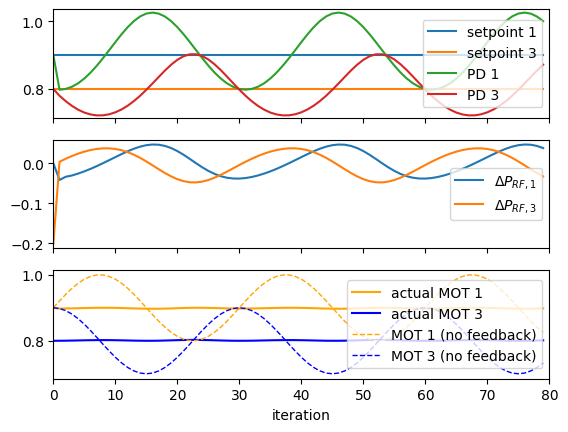

In [113]:
# example: there is a slowly varying sinusoidal noise on MOT 1,
# due, e.g., to temperature drifts in the lab which change the 
# fiber coupling. if we perfectly cancel the drift by changing
# AOM 1, we will see apparent drift of MOT 3 on PD 3. However,
# by using the scheme proposed above we will not wrongly
# adjust MOT 3 which has no real drift.

iters = 80

eta_fiber1 = lambda i: 0.9 + 0.1*sin(2*pi*i/30) # slow fiber drift
eta_fiber3 = lambda i: 0.8 + 0.1*cos(2*pi*i/30)

kp1 = 2
kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

eta_def = 1 # the default AOM efficiency, normalized

eta1 = eta_def # the diffraction efficiency of AOM 1
eta3 = eta_def # the diffraction efficiency of AOM 3.

sp1 = 0.9 # arbitrary; in some units for the PD
sp3 = 0.8

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)

P10 = 1 # the baseline power, before the fiber coupler
P30 = 1

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power)

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the actual value of power at the atoms
mot_power3 = zeros(iters)

# eta1 = zeros(iters)
# eta3 = zeros(iters)

for i in range(iters):
    
    # measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = P10*eta_fiber1(i)*eta1*eta3
    
    # adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]/(eta3)
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    PD1[i] += g1*delta_rf_power1[i]
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM
    eta1 *= (1+dPD1)
    
    # the actual MOT 1 power
    mot_power1[i] = PD1[i]/eta3

    # measure power on ch3
    PD3[i] = P30*eta_fiber3(i)*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]/(eta1)
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    PD3[i] += g3*delta_rf_power3[i]
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 *= (1+dPD3)
    
    # the actual MOT 3 power
    mot_power3[i] = PD3[i]/eta1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='actual MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='actual MOT 3',c='blue')
ax3.plot(steps,P10*eta_def*eta_fiber1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
ax3.plot(steps,P30*eta_def*eta_fiber3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
# ax3.set_ylim((0.99*minp,1.01*maxp))
for ax in axes:
    ax.set_xlim((0,iters))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()

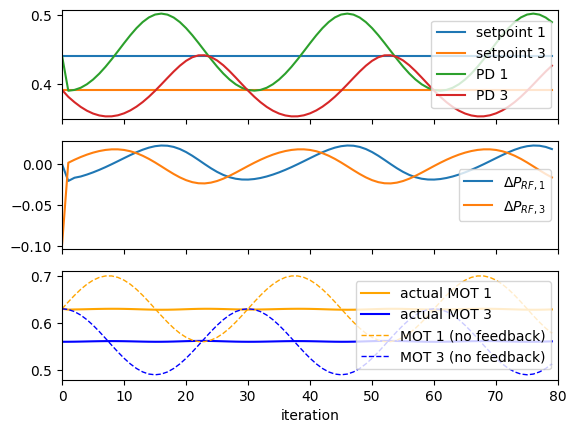

In [118]:
# example: there is a slowly varying sinusoidal noise on MOT 1,
# due, e.g., to temperature drifts in the lab which change the 
# fiber coupling. if we perfectly cancel the drift by changing
# AOM 1, we will see apparent drift of MOT 3 on PD 3. However,
# by using the scheme proposed above we will not wrongly
# adjust MOT 3 which has no real drift.

iters = 80

eta_f1_mean = 0.9
eta_f3_mean = 0.8

eta_f1 = lambda i: eta_f1_mean + 0.1*sin(2*pi*i/30) # slow fiber drift
eta_f3 = lambda i: eta_f3_mean + 0.1*cos(2*pi*i/30)

kp1 = 2
kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

eta_def = 0.7 # the default AOM efficiency, normalized

eta1 = eta_def # the diffraction efficiency of AOM 1
eta3 = eta_def # the diffraction efficiency of AOM 3.

P10 = 1 # the baseline power, before the fiber coupler
P30 = 1

sp1 = eta_f1_mean*eta1*eta3*P10 # setpoint1, what is measured at PD1
sp3 = eta_f3_mean*eta1*eta3*P30

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power)

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the actual value of power at the atoms
mot_power3 = zeros(iters)

# eta1 = zeros(iters)
# eta3 = zeros(iters)

for i in range(iters):
    
    # measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = P10*eta_f1(i)*eta1*eta3
    
    # adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]*(eta_def/eta3)
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    PD1[i] += g1*delta_rf_power1[i]
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM
    eta1 *= (1+dPD1)
    
    # the actual MOT 1 power
    mot_power1[i] = PD1[i]/eta3

    # measure power on ch3
    PD3[i] = P30*eta_f3(i)*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]*(eta_def/eta1)
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    PD3[i] += g3*delta_rf_power3[i]
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 *= (1+dPD3)
    
    # the actual MOT 3 power
    mot_power3[i] = PD3[i]/eta1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='actual MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='actual MOT 3',c='blue')
ax3.plot(steps,P10*eta_def*eta_f1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
ax3.plot(steps,P30*eta_def*eta_f3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
# ax3.set_ylim((0.99*minp,1.01*maxp))
for ax in axes:
    ax.set_xlim((0,iters))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()

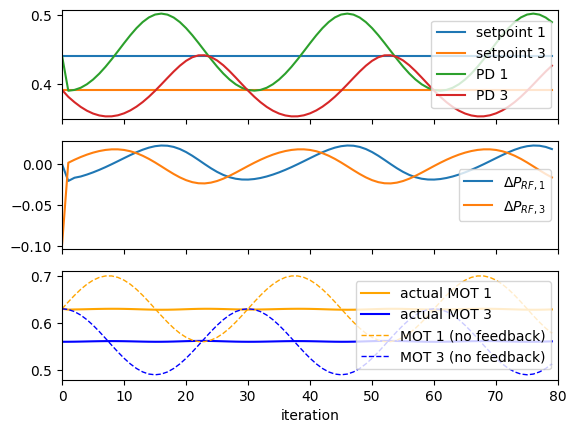

In [118]:
# example: there is a slowly varying sinusoidal noise on MOT 1,
# due, e.g., to temperature drifts in the lab which change the 
# fiber coupling. if we perfectly cancel the drift by changing
# AOM 1, we will see apparent drift of MOT 3 on PD 3. However,
# by using the scheme proposed above we will not wrongly
# adjust MOT 3 which has no real drift.

iters = 80

eta_f1_mean = 0.9
eta_f3_mean = 0.8

eta_f1 = lambda i: eta_f1_mean + 0.1*sin(2*pi*i/30) # slow fiber drift
eta_f3 = lambda i: eta_f3_mean + 0.1*cos(2*pi*i/30)

kp1 = 2
kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

eta_def = 0.7 # the default AOM efficiency, normalized

eta1 = eta_def # the diffraction efficiency of AOM 1
eta3 = eta_def # the diffraction efficiency of AOM 3.

P10 = 1 # the baseline power, before the fiber coupler
P30 = 1

sp1 = eta_f1_mean*eta1*eta3*P10 # setpoint1, what is measured at PD1
sp3 = eta_f3_mean*eta1*eta3*P30

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power)

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the actual value of power at the atoms
mot_power3 = zeros(iters)

# eta1 = zeros(iters)
# eta3 = zeros(iters)

for i in range(iters):
    
    # measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = P10*eta_f1(i)*eta1*eta3
    
    # adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]*(eta_def/eta3)
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    PD1[i] += g1*delta_rf_power1[i]
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM
    eta1 *= (1+dPD1)
    
    # the actual MOT 1 power
    mot_power1[i] = PD1[i]/eta3

    # measure power on ch3
    PD3[i] = P30*eta_f3(i)*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]*(eta_def/eta1)
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    PD3[i] += g3*delta_rf_power3[i]
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 *= (1+dPD3)
    
    # the actual MOT 3 power
    mot_power3[i] = PD3[i]/eta1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='actual MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='actual MOT 3',c='blue')
ax3.plot(steps,P10*eta_def*eta_f1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
ax3.plot(steps,P30*eta_def*eta_f3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
# ax3.set_ylim((0.99*minp,1.01*maxp))
for ax in axes:
    ax.set_xlim((0,iters))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()

## abstract away unmeasureable parameters

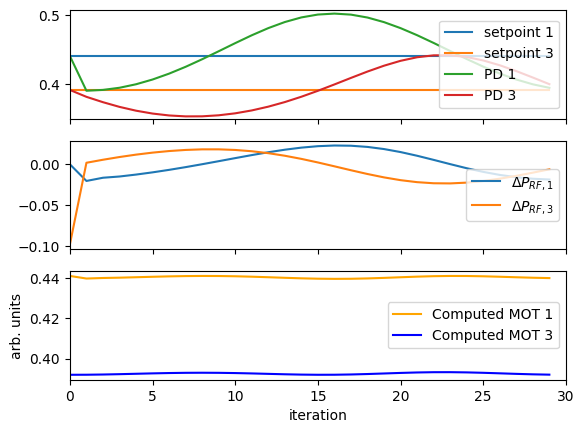

In [8]:
iters = 30 # how many feedback cycles

## parameters that exist in the lab

eta_f1_mean = 0.9
eta_f3_mean = 0.8

eta_f1 = lambda i: eta_f1_mean + 0.1*sin(2*pi*i/30) # slow fiber drift
eta_f3 = lambda i: eta_f3_mean + 0.1*cos(2*pi*i/30)

eta_def = 0.7 # the default AOM efficiency, normalized

eta1 = eta_def # the diffraction efficiency of AOM 1
eta3 = eta_def # the diffraction efficiency of AOM 3.

P10 = 1 # the baseline power, before the fiber coupler
P30 = 1

g1 = g3 = 0.5 # xfer function: d(diffraction efficiency)/d(RF power).

## parameters that are set, measured, or calculated in the code

kp1 = 2
kp3 = 2

error1 = zeros(iters)
error3 = zeros(iters)

# setpoints: these measured are measured at the PDs when the MOT is in the right place
sp1 = eta_f1_mean*eta1*eta3*P10 # this would not be calculated in the lab.
sp3 = eta_f3_mean*eta1*eta3*P30

PD1 = zeros(iters) # the value measured by the photodiode (PD)
PD3 = zeros(iters)

delta_rf_power1 = zeros(iters) # the change in RF power compared to the last iteration
delta_rf_power3 = zeros(iters)

dPD3 = dPD1 = 0 # percent change in power due to AOM compared to last cycle. starts at zero by definition

mot_power1 = zeros(iters) # the calculated value of power at the atoms in arbitrary units
mot_power3 = zeros(iters)

correct_AOM1 = 1
correct_AOM3 = 1

eta1_list = [eta_def]
dPD1_list = [0]

for i in range(iters):
        
    # lab: measure power on ch1. even if noise=0, a previous change to the other AOM will cause apparent fluctuation
    PD1[i] = P10*eta_f1(i)*eta1*eta3
    
    # code: adjust AOM1 but factor out the change induced by AOM3 on the last cycle
    error1[i] = sp1 - PD1[i]*correct_AOM3 #(eta_def/eta3) # eta_def*correct_AOM3
    delta_rf_power1[i] = kp1*error1[i]
    PD1_temp = PD1[i] # the power on this iteration before correcting
    
    # simulation book-keeping
    PD1[i] += g1*delta_rf_power1[i] # measured
    dPD1 = (PD1[i] - PD1_temp)/PD1_temp # percent change in power due to AOM 1    
    eta1 *= (1+dPD1)
    
    # code
    correct_AOM1 /= (1+dPD1)
    
    # computed MOT 1 power, arb. units
    mot_power1[i] = PD1[i]*correct_AOM3

    # measure power on ch3
    PD3[i] = P30*eta_f3(i)*eta1*eta3
    
    # adjust AOM3 but factor out the change induced by AOM1
    error3[i] = sp3 - PD3[i]*correct_AOM1
    delta_rf_power3[i] = kp3*error3[i]
    PD3_temp = PD3[i]
    
    # simulation book-keeping
    PD3[i] += g3*delta_rf_power3[i] # measured
    dPD3 = (PD3[i] - PD3_temp)/PD3_temp # percent change in power due to AOM
    eta3 *= (1+dPD3)
    
    # code
    correct_AOM3 /= (1+dPD3)
    
    # computed MOT 1 power, arb. units
    mot_power3[i] = PD3[i]*correct_AOM1

steps = array(list(range(iters)))

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True)
ax,ax1,ax3 = axes
ax.plot(steps,[sp1]*iters,label='setpoint 1')
ax.plot(steps,[sp3]*iters,label='setpoint 3')

ax.plot(steps,PD1,label='PD 1')
ax.plot(steps,PD3,label='PD 3')

ax1.plot(steps,delta_rf_power1,label=r'$\Delta P_{RF,1}$')
ax1.plot(steps,delta_rf_power3,label=r'$\Delta P_{RF,3}$')

ax3.plot(steps,mot_power1,label='Computed MOT 1',c='orange')
ax3.plot(steps,mot_power3,label='Computed MOT 3',c='blue')
ax3.set_ylabel("arb. units")
# ax3.plot(steps,P10*eta_def*eta_f1(steps),label='MOT 1 (no feedback)',linestyle='--',c='orange',lw=1)
# ax3.plot(steps,P30*eta_def*eta_f3(steps),label='MOT 3 (no feedback)',linestyle='--',c='blue',lw=1)

pd = list(PD1)+list(PD3)
minpd = min(pd)
maxpd = max(pd)
ax.set_ylim((0.99*minpd,1.01*maxpd))

powers = list(mot_power1)+list(mot_power3)
minp = min(powers)
maxp = max(powers)
for ax in axes:
    ax.set_xlim((0,iters))
    ax.legend(loc='right')
ax.set_xlabel("iteration")
plt.show()